# KNN Clasifier

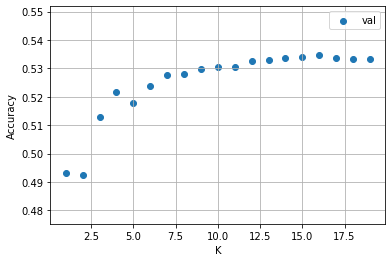

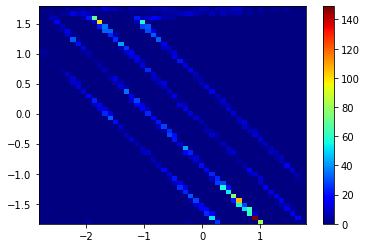

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import gaussian_kde

'''S008 mean and standard deviation to normalize GPS inputs'''
s008_mean=[757.8,555.4,2.1]
s008_SD=[4.5,68.0,0.9]


def load_dataset(filename):
    '''
    :param filename of the dataset to load and LIDAR format parameteres
    :return: [GPS,LIDAR,labels,LOS/NLOS] dataset with LOS available only for s008 and s009
    '''
    npzfile = np.load(filename)
    POS=npzfile['POS']
    for i in range(0,3):
        POS[:,i]=(POS[:,i]-s008_mean[i])/s008_SD[i]
    Y=npzfile['Y']
    return POS,Y



POS_tr, Y_tr = load_dataset('./data/s008.npz')
POS_val, Y_val,=load_dataset('./data/s009.npz')
Y_tr=np.argmax(Y_tr,axis=1)
Y_val=np.argmax(Y_val,axis=1)
test_scores=[]
centers=range(1,20)
for k in centers:
    neigh = KNeighborsClassifier(n_neighbors= k,weights='distance')
    neigh.fit(POS_tr,Y_tr)
    test_scores.append(neigh.score(POS_val,Y_val))
plt.scatter(centers,test_scores,label='val')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
best_neigh = KNeighborsClassifier(n_neighbors= np.argmax(test_scores),weights='distance')
preds=neigh.predict(POS_val)
errors=POS_val[np.where((preds!=Y_val)*1==1)]
plt.hist2d(errors[:,0], errors[:,1], (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.show()



# Averaging over K nearest neighbors
Only XY coordinates are used, as it performs better than XYZ coordinates.
Results are for Top-1 Accuracy of beam id prediction.

1 Neighbors Accuracy: 0.4618178045237601
2 Neighbors Accuracy: 0.408694749948122
3 Neighbors Accuracy: 0.49315210624610917
4 Neighbors Accuracy: 0.5304004980286366
5 Neighbors Accuracy: 0.5523967628138619
6 Neighbors Accuracy: 0.5547831500311268
7 Neighbors Accuracy: 0.569620253164557
8 Neighbors Accuracy: 0.5783357543058726
9 Neighbors Accuracy: 0.5810334094210418
10 Neighbors Accuracy: 0.5829010168084665
11 Neighbors Accuracy: 0.5858061838555717
12 Neighbors Accuracy: 0.5971155841460885
13 Neighbors Accuracy: 0.5912014940859099
14 Neighbors Accuracy: 0.5981531438057688
15 Neighbors Accuracy: 0.5948329528947914
16 Neighbors Accuracy: 0.5904752023241336
17 Neighbors Accuracy: 0.5917202739157501
18 Neighbors Accuracy: 0.5906827142560698
19 Neighbors Accuracy: 0.5893338866984852
20 Neighbors Accuracy: 0.5897489105623573
21 Neighbors Accuracy: 0.5887113509026769
22 Neighbors Accuracy: 0.5877775472089645
23 Neighbors Accuracy: 0.5855986719236356
24 Neighbors Accuracy: 0.5894376426644532
25

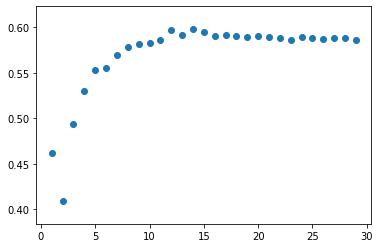

In [147]:
## Only XY coordinates are used, as it performs better than XYZ coordinates
## Results are for Top-1 Accuracy of beam id prediction.

import scipy
from scipy.spatial import distance
from scipy import stats

ACC=[]
for kn in range(1,30):
    pred=[]
    for item in POS_val:
        dis = distance.cdist(np.reshape(item[:2], (1,2)), POS_tr[:,:2], 'euclidean')
        ind = np.argsort(dis)
        beams = Y_tr[ind[0,:kn]]
        pred.append(stats.mode(beams)[0])
        
    acc = np.sum(np.reshape(Y_val, (Y_val.shape[0],1))==pred)/Y_val.shape[0]
    ACC.append(acc)
    print(kn, 'Neighbors Accuracy:', acc)
plt.scatter(range(1,30), ACC)
plt.show()

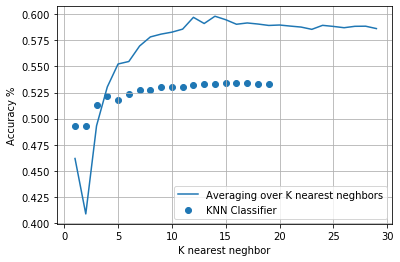

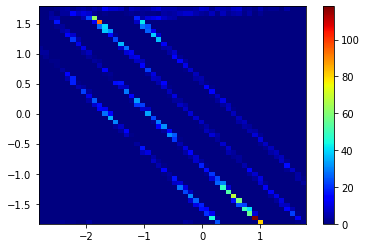

In [148]:
plt.plot(range(1,30), ACC, label='Averaging over K nearest neghbors')
plt.scatter(range(1,20), test_scores, label='KNN Classifier')
plt.xlabel('K nearest neghbor')
plt.ylabel('Accuracy %')
plt.grid()
plt.legend()
plt.show()

errors=POS_val[np.where((np.reshape(Y_val, (Y_val.shape[0],1))!=pred))[0]]
plt.hist2d(errors[:,0], errors[:,1], (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.show()